<a href="https://colab.research.google.com/github/jiiiisoo/machinelearning/blob/main/1.%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **지도학습: 분류**

회귀 문제는 목표 데이터가 연속된 수였지만 분류문제에서 목표 데이터는 클래스이다. 

또 지금까지의 모델은 목표 데이터의 예측 값을 출력하는 함수였지만 지금부터는 확률을 출력하는 함수를 고려하여 예측의 불확실성을 정량적으로 다룬다.

**1차원 입력 2클래스 분류**

먼저 가장 간단한, 입력 정보가 1차원이고 분류할 클래스가 2가지인 경우를 생각한다.

1차원의 입력변수를 x_n으로, 목표 변수(target variable)을 t_n으로 하고 t_n은 0또는 1만을 갖는 변수로 클래스 0이면 0, 클래스 1이면 1을 갖도록 한다. 이 t_n을 클래스, 카테고리, 또는 라벨이라고 한다.

예를 들어 곤충 N마리의 데이터를 생각해보아 각각의 무게를 x_n으로 성별을 t_n으로 나타내어 t_n=0이면 암컷, t_n=1이면 수컷을 나타낸다고 하자. 이 데이터를 기초로 무게를 통해 성별을 예측하는 모델을 만드는 것이 목적이다.

X=[1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
Y=[1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


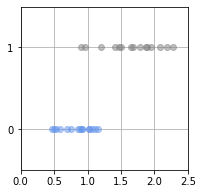

In [6]:
##데이터 생성
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(seed=0) #난수 고정
X_min=0
X_max=2.5
X_n=30
X_col=['cornflowerblue', 'gray']
X=np.zeros(X_n)
T=np.zeros(X_n, dtype=np.uint8) #??
Dist_s=[0.4,0.8] #몸무게 시작 지점
Dist_w=[0.8,1.6] #몸무게 폭
Pi=0.5 #클래스 0의 비율
for i in range (X_n):
  wk=np.random.rand()
  T[i]=0*(wk<Pi)+1*(wk>=Pi) #True=1, False=0 / T:성별
  X[i]=np.random.rand()*Dist_w[T[i]]+Dist_s[T[i]] #나이 / 암컷이라면 Dist_s[0]=0.4에서 폭 0.8의 균일한 분포에서 질량을 샘플링 하고, 수컷의 경우 0.8에서 폭 1.6의 분포에서 샘플링

##data 표시
print('X={}'.format(np.round(X,2)))
print('Y={}'.format(T))

##data 분포 표시
#만약 K==0이면, t==0일 때의 x와 t만 추출하여 플롯하는 명령 (K=1,...,max(t)까지도 마찬가지)
def show_data(x,t):
  K=np.max(t)+1
  for k in range(K):
    plt.plot(x[t==k],t[t==k],X_col[k], alpha=0.5, linestyle='none', marker='o')
    plt.grid(True)
    plt.ylim(-.5,1.5)
    plt.xlim(X_min,X_max)
    plt.yticks([0,1])

##main
fig=plt.figure(figsize=(3,3))
show_data(X,T)
plt.show()

문제를 해결하는 방법은 수컷과 암컷을 분리하는 경계선을 결정하는 것이고 이를 decision boundary, 결정 경계라고 한다. 결정 경계를 정하여 경계보다 작으면 암컷, 크면 수컷으로 예측할 수 있다.

결정 경계를 결정하는 방법은, 먼저 선형 회귀 모델 사용이다.

클래스를 0,1의 값으로 해석하여 분포에 직선을 맞추고, t=0.5를 지나는 x값을 결정 경계로 정한다.

w0=0.75, w1=-0.43
boundary=1.24 g


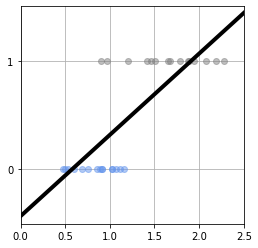

In [12]:
def fit_line(x,t):
  mtx=np.mean(t*x)
  mt=np.mean(t)
  mxx=np.mean(x**2)
  mx=np.mean(x)
  w0=(mtx-mt*mx)/(mxx-mx**2)
  w1=mt-mx*((mtx-mt*mx)/(mxx-mx**2))
  return np.array([w0,w1])

def line(x,w):
  y=w[0]*x+w[1]
  return y

def show_line(w):
  xb=np.linspace(X_min,X_max,100)
  y=line(xb,w)
  plt.plot(xb,y,color='black',linewidth=4)

fig=plt.figure(figsize=(4,4))
W=fit_line(X,T)
boundary=(0.5-W[1])/W[0]
print('w0={:.2f}, w1={:.2f}'.format(W[0],W[1]))
print('boundary={:.2f} g'.format(boundary))
show_data(X,T)
show_line(W)
plt.show()

하지만 위의 선형 회귀 모델을 사용했을 때의 문제점은 

과연 t=0.5일 때의 x값을 결정 경계로 하는 것이 옳은 것인지

확실히 수컷이라고 할 수 있는, 2.0~2.5 정도의 질량이 큰 데이터에서 오차가 직선과의 오차가 커지므로 이 오차를 해소하려 직선이 수컷쪽으로 기울어 결정 경계가 수컷쪽에 끌려간다

등이 생긴다.